In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Review Exercise

Part 1: Answer each of the questions based on lists, loops and functions

1. How do you add the value 5000 after 3000 in the following list<br> <br>
   `list1=[1000,2000,3000,1000]` 

In [2]:
list1=[1000,2000,3000,1000]

list1.insert(3,2000)
print(list1)

[1000, 2000, 3000, 2000, 1000]


2. How do you remove `NaNs` from the following list? <br> <br> list2=['NaN', 21, 30, 'NaN', 27, 13]

In [3]:
list2=['NaN', 21,30,'NaN',27,13]

while 'NaN' in list2:
    list2.remove('NaN')
    
print(list2)

[21, 30, 27, 13]


3. Using a nested `for` loop (a loop inside a loop) print the following output:<br><br>
1<br>
1 2 <br>
1 2 3 <br>
1 2 3 4 <br>
1 2 3 4 5 <br>

In [4]:
value = 5 

for i in range (0, value+1,1):
    for j in range(1,i+1):
        print(j, end=' ')
    print("")


1 
1 2 
1 2 3 
1 2 3 4 
1 2 3 4 5 


4. Print all the prime numbers between 70 and 121

In [5]:
start=70
end=121
print('The prime numbers between', start,'and', end, 'are:')

for num in range(start, end+1):
    if num >1:
        for i in range (2, num):
            if (num % i) == 0:
                break # as number is not a prime number
        else: 
            print(num)

The prime numbers between 70 and 121 are:
71
73
79
83
89
97
101
103
107
109
113


5. Create a function which will return the values of the following list cubed.<br>

`list3=[1,2,3,4,5,6,7,8,9,10]`

In [6]:
def cubing(values):
    """Function to cube the values in any given list"""
    
    # create new list
    cubed_list=[]
    # loop through given items in list
    for i in values:
        # append values
        cubed_list.append(i**3)
    # return new list
    return(cubed_list)
 
list3=[1,2,3,4,5,6,7,8,9,10]
print(cubing(list3))

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]


### Part 2: Coding Exercise


**2.a)** Write a function which returns the gravitational accelerations by a body of mass `M`. The gravitational acceleration in given by:

$$ a = \frac{\Gamma M}{r^2} $$

with $\Gamma = 6,672 \cdot 10^{-11} \frac{\text{m}³}{\text{kg}\,\text{s}²}$ and $r$ is the distance between the two masses.

**2.b)** The mass of the Earth is 5.972 × 10<sup>24</sup> kg. The Earth is not a perfect sphere due to its rotation. Its shape can be approximated as an ellipsoid that is slightly flattened at the poles. The radius at the poles is 6357 km and at the equator it is 6378 km. What is the gravitational acceleration at the surface of the Earth at the poles, the equator and in Kiel (check https://rechneronline.de/erdradius/)? 

**2.c)** The radius of the Earth depends on the latitude ("Breitengrad") with the formula given at the above website. We can easily implement that in python, so that we do not need the website. Write a function that calculates the radius of the Earth depending on latitude. Use the trigonometric functions from Numpy (`np.sin, np.cos`). 
*Hint: Validate your results against those of the website.*


**OPTIONAL: 2.d)** Determine the gravitational acceleration for each latitude from the North Pole (90°) to the Equator (0°). Plot your results with latitude on the x axis and g on the y axis. 



In [7]:
def gravcalc(mass,dist=None,degree=None):
    """ Function which calculates the gravitational acceleration of a body of mass"""
    
    # declare constants
    G=6.672e-11 #m^3/kgs^2
    rp = 6357000 #m
    re = 6387000 #m
    rk = 6047000 #m
    
    # if the degree variable is passed to the function...
    if degree:
        # change to radians
        degree=np.deg2rad(degree) 
        
        # calculate radius
        R = np.sqrt(((((re**2)*np.cos(degree))**2+((rp**2)*np.sin(degree))**2)/(((re*(np.cos(degree)**2))+(rp*(np.sin(degree)**2)))**2)))
        
        # calculate a
        a = (G*mass)/(R**2)
        return a, R
    
    # if a radius is passed to the function...
    elif dist: 
        # calculate a
        a = (G*mass)/(dist**2)
        return a
    
    else:
        return 

mass = 5.972e24
rp = 6357000
re = 6387000
rk = 6047000

print('g at the poles is', np.round(gravcalc(mass,dist=rp),5),'m.s.s')
print('g at the equator is', np.round(gravcalc(mass,dist=re),5),'m.s.s')
print('g at Kiel is', np.round(gravcalc(mass,dist=rk),5),'m.s.s')

print('g at 32 degrees latitude is', np.round(gravcalc(mass,degree=32),5)[0],'m.s.s, where the radius is',np.round(gravcalc(mass,0,32),2)[1],'m')

g at the poles is 9.85988 m.s.s
g at the equator is 9.76747 m.s.s
g at Kiel is 10.89672 m.s.s
g at 32 degrees latitude is 9.79302 m.s.s, where the radius is 6378660.94 m


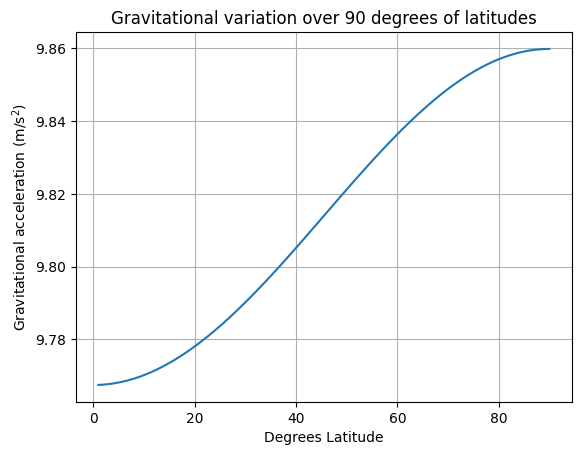

In [8]:
# create degrees f=of latitude as a list
degrees = np.linspace(1,90,90).tolist()

g =[] # store calculated values of g

# loop through every degree
for i in degrees:
    # append calculated value to list
    g.append(gravcalc(mass,degree=i)[0])
  
# plot
plt.figure()
plt.plot(degrees,g)
plt.xlabel('Degrees Latitude')
plt.ylabel('Gravitational acceleration (m/s$^2$)')
plt.title('Gravitational variation over 90 degrees of latitudes')
plt.grid()
plt.show()